In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 


# (1) Load the json data using pandas

In [8]:
#Loading the json data.
CSR_data = pd.read_json(r'CRS16.json' ,lines=True)

In [9]:
#Print the first 5 rows of the dataframe.
CSR_data.head()

,time,velocity,altitude
0,0.000,0.277,0.0
1,0.033,0.277,0.0
2,0.067,0.555,0.0
3,0.100,0.555,0.0
4,0.133,0.555,0.0


# Data Insight

In [4]:
CSR_data.shape

(15943, 3)

 - dataset comprises of 15943 observations and 3 chracteriestics

##  Calculating Acceleration

In [5]:
CSR_data["acceleration"] = CSR_data.eval('velocity/time')
CSR_data.drop([0],inplace= True)
CSR_data.head()


,time,velocity,altitude,acceleration
1,0.033,0.277,0.0,8.393939
2,0.067,0.555,0.0,8.283582
3,0.100,0.555,0.0,5.550000
4,0.133,0.555,0.0,4.172932
5,0.166,0.555,0.0,3.343373


# (2) Basic EDA and statistical analysis

In [6]:
# gives information about the data types,columns, null value counts, memory usage etc
CSR_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15942 entries, 1 to 15942
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   time          15942 non-null  float64
 1   velocity      15942 non-null  float64
 2   altitude      15942 non-null  float64
 3   acceleration  15942 non-null  float64
dtypes: float64(4)
memory usage: 622.7 KB


 - Data has only float values
 - No variable column has null/missing values

## Summary statistics

In [7]:
# basic statistic details about the data.
CSR_data.describe()

,time,velocity,altitude,acceleration
count,15942.000000,15942.000000,15942.000000,15942.000000
mean,269.729052,2709.394691,134.124551,8.847110
std,156.107344,2019.367634,78.680829,2.453469
min,0.033000,0.277000,0.000000,1.414827
25%,132.874500,1337.916000,54.000000,7.989968
50%,272.116000,2175.972000,170.000000,8.646650
75%,404.958500,3966.179750,207.000000,10.270895
max,538.333000,7538.611000,209.000000,14.101331


### Key Observations:

 - Mean value is less than median value of each column represented by 50%(50th percentile) in index column.
 - Notably large differnece in 75th %tile and max values of predictors "velocity".
 - Thus observations 1 and 2 suggests that there are extreme values-Outliers in our dataset

## Data Visualization

## To check missing values

<AxesSubplot:>

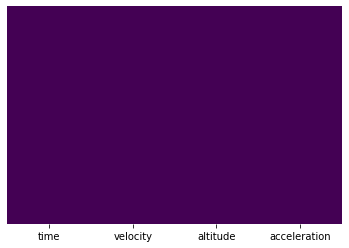

In [8]:
sns.heatmap(CSR_data.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

 - Dataset has no missing values.
 - If there were any, you would've noticed in figure represented by different colour shade on purple background.

## Scatter Matrix Plot

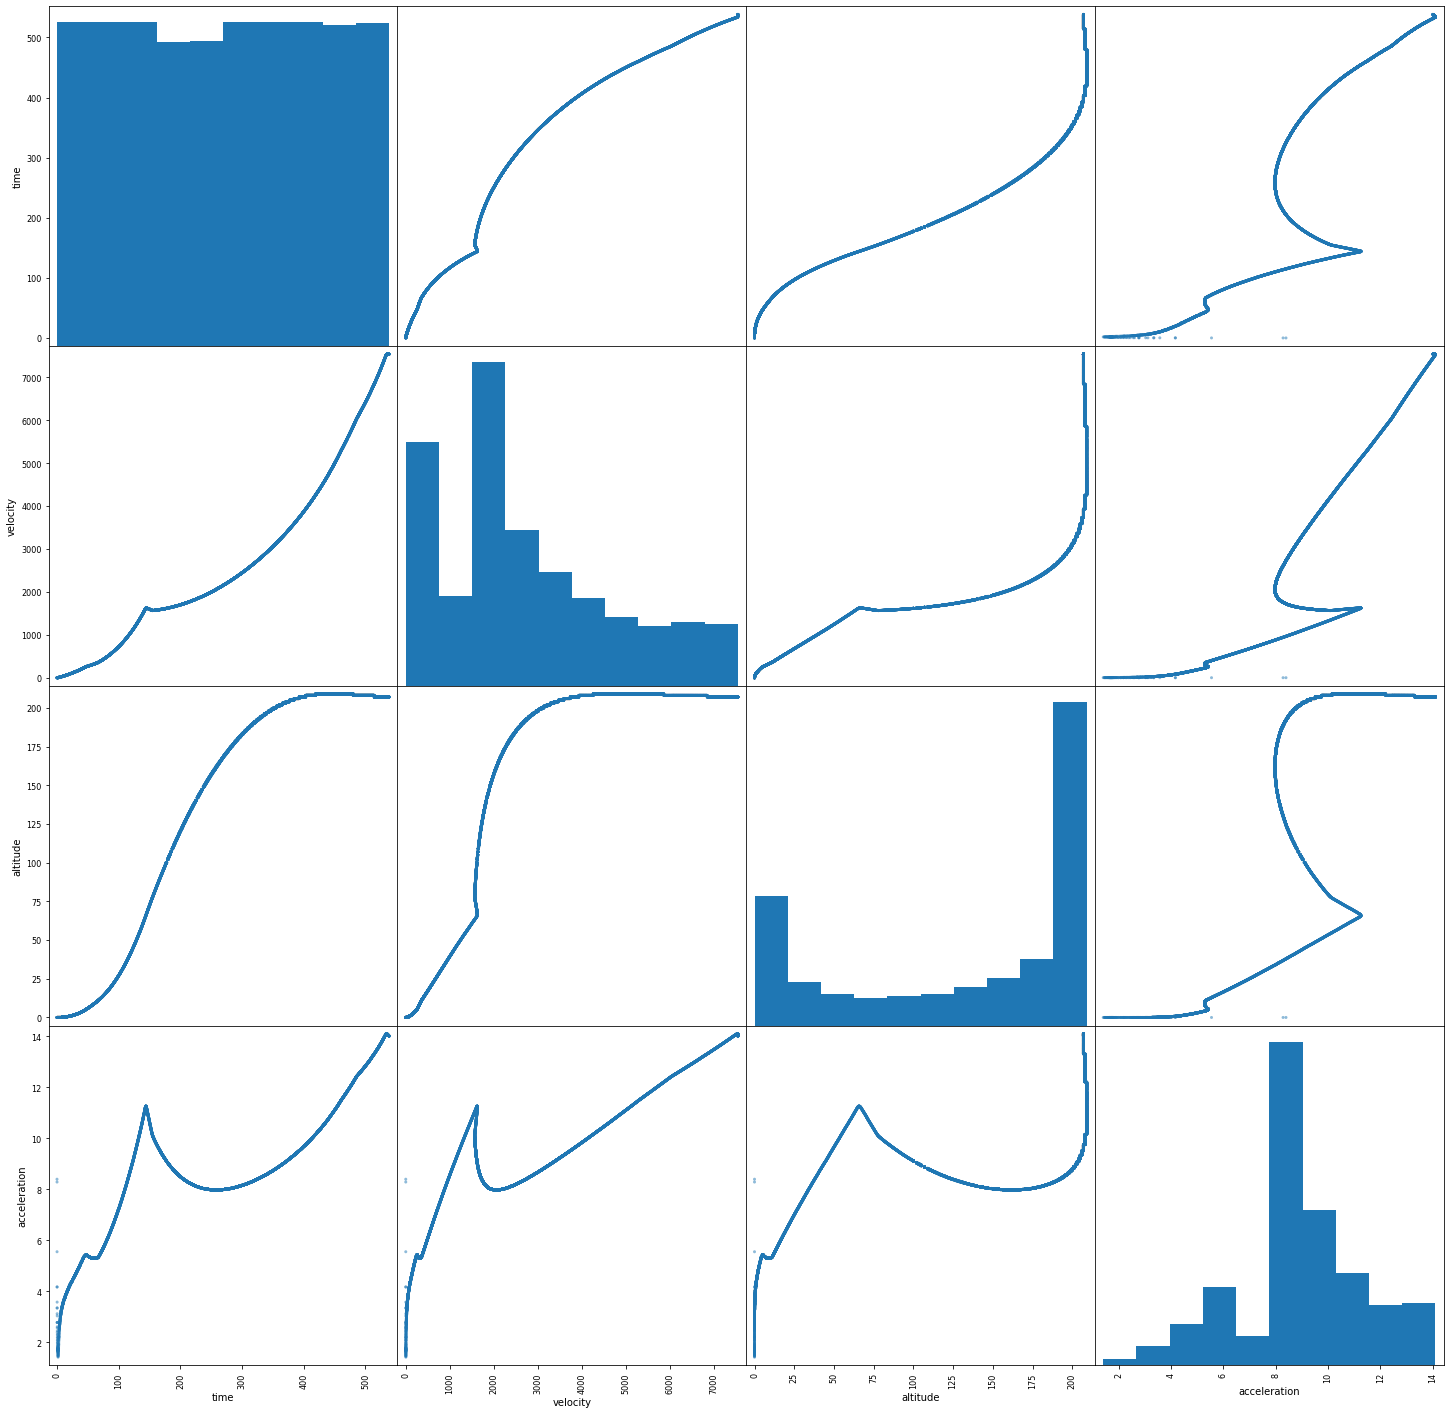

In [9]:
p=pd.plotting.scatter_matrix(CSR_data,figsize=(25, 25))

## Key Observations:


# Answers 

 - ANS(2) --  Here in the second column of third row "velocity" linearly increases with "altitude" till altitude value 75. After that velocity increases non-linearly and and after altitude value 200. altitude have no effect on Velocity.
 - ANS(3) --Here in first row of second column as "time" vs "velocity" plot will show the result of acceleration profile" as accleration profile is continiously  increaseing. 
 - ANS(4) --Here in third row of first column as "altitude" vs "time" plot shows the "velocity profile" as we know that rate of change of displacement is velocity. No, velocity profile does not matches with velocity that is given in the data. So, They are  not same as there may be value error in the velocity column of data as you can clearly see in the graph of Second row of second column."Altitude" vs "velocity".

## To check correlation

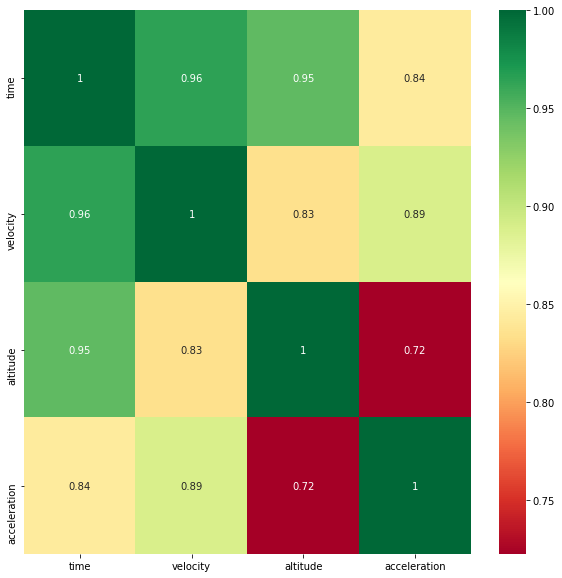

In [10]:
plt.figure(figsize=(10,10))
p=sns.heatmap(CSR_data.corr(), annot = True ,cmap ='RdYlGn')

 - Here we can infer that "time" has strong positive correlation with "velocity", "time" and "acceleration". whereas "velocity"and "acceleration" has correlation with altitude but not as powerful as time.

## To check Outliers

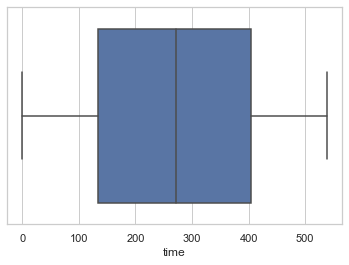

In [11]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=CSR_data["time"])




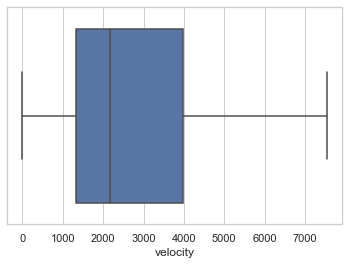

In [12]:
ax =sns.boxplot(x=CSR_data["velocity"])

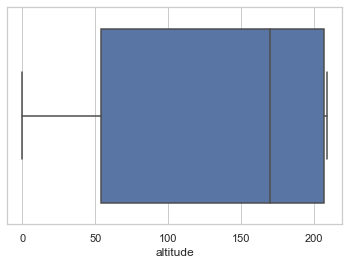

In [13]:
ax= sns.boxplot(x=CSR_data["altitude"])

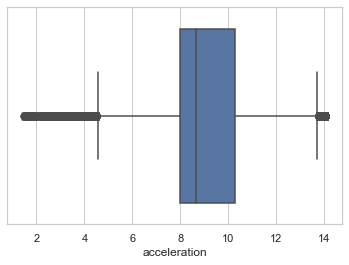

In [14]:
ax= sns.boxplot(x=CSR_data["acceleration"])

 - There are no outliers found in "time" , "velocity", "altitude" although we can see the outliers in "acceleration".

## To check distribution-Skewness

C:\Users\Lenovo\.conda\envs\laraib\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\.conda\envs\laraib\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


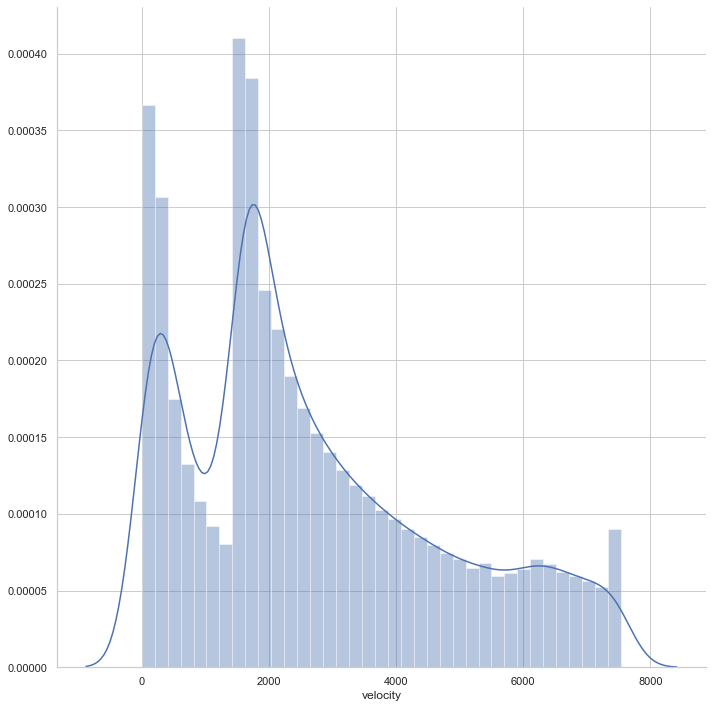

In [15]:
sns.FacetGrid(CSR_data, hue= None, size=10) \
    .map(sns.distplot , "velocity") \
    .add_legend()
plt.show()

 - Here "velocity" column appears to be right skewed

C:\Users\Lenovo\.conda\envs\laraib\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\.conda\envs\laraib\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


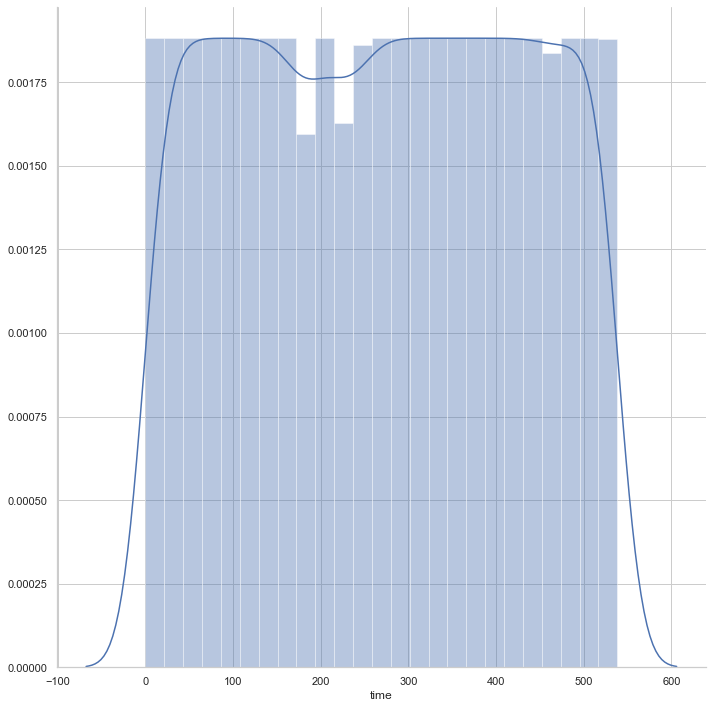

In [16]:
sns.FacetGrid(CSR_data, hue= None, size=10) \
    .map(sns.distplot , "time") \
    .add_legend()
plt.show()

 - Here "time" column appears to be normally distributed

C:\Users\Lenovo\.conda\envs\laraib\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\.conda\envs\laraib\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


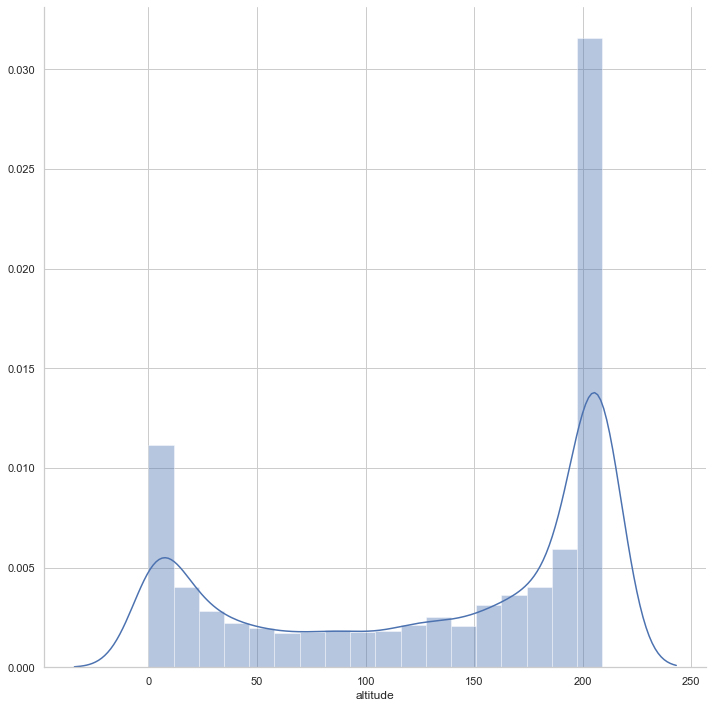

In [17]:
sns.FacetGrid(CSR_data, hue= None, size=10) \
    .map(sns.distplot , "altitude") \
    .add_legend()
plt.show()

 - Here "altitude" column appears to be left skewed

C:\Users\Lenovo\.conda\envs\laraib\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\Lenovo\.conda\envs\laraib\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


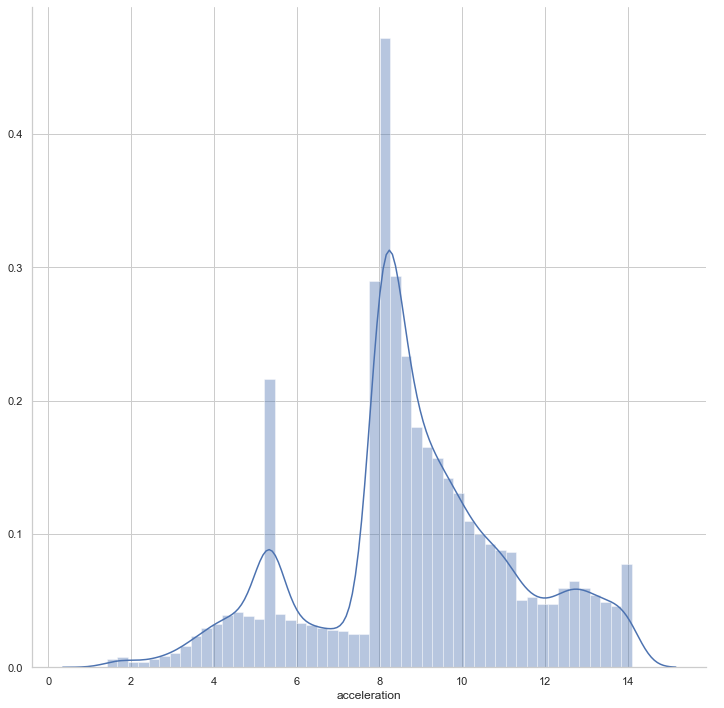

In [18]:
sns.FacetGrid(CSR_data, hue= None, size=10) \
    .map(sns.distplot , "acceleration") \
    .add_legend()
plt.show()

 - Here "acceleration" column appears to be left skewed

###  PDF and CDF Calculations.

sum of Counts: [0.00188194 0.00188194 0.00188194 0.00176774 0.0017724  0.00188194
 0.00188194 0.00188194 0.00186446 0.00188077]


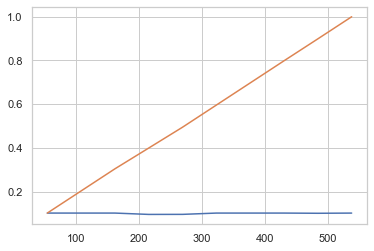

In [19]:
# plots of PDF and CDF for "time"
counts, bin_edgs = np.histogram(CSR_data["time"] , bins =10 ,density = True)
print("sum of Counts:"  , counts )
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edgs[1:],pdf)
plt.plot(bin_edgs[1:],cdf)

sum of Counts: [2.55042348e-04 9.36126074e-05 3.38336766e-04 1.63426810e-04
 1.18575969e-04 9.13659048e-05 7.19776937e-05 6.24916161e-05
 6.68185989e-05 6.49047411e-05]


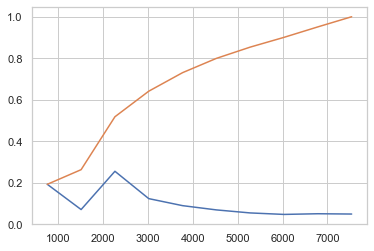

In [20]:
#plots of PDF and CDF for "velocity"
counts, bin_edgs = np.histogram(CSR_data["velocity"] , bins =10 ,density = True)
print("sum of Counts:"  , counts )
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edgs[1:],pdf)
plt.plot(bin_edgs[1:],cdf)

sum of Counts: [0.00805252 0.00271619 0.00194485 0.00174076 0.0018428  0.00197486
 0.00237104 0.00293228 0.00415681 0.02011478]


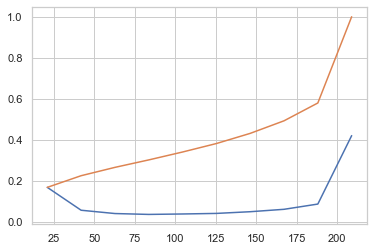

In [21]:
#plots of PDF and CDF for "altitude"
counts, bin_edgs = np.histogram(CSR_data["altitude"] , bins =10 ,density = True)
print("sum of Counts:"  , counts )
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edgs[1:],pdf)
plt.plot(bin_edgs[1:],cdf)

sum of Counts: [0.00553775 0.01779991 0.03752814 0.0710513  0.02689764 0.29364903
 0.14091593 0.08346179 0.05443805 0.0569597 ]


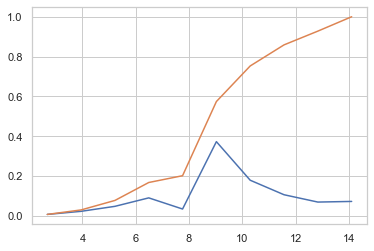

In [22]:
counts, bin_edgs = np.histogram(CSR_data["acceleration"] , bins =10 ,density = True)
print("sum of Counts:"  , counts )
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edgs[1:],pdf)
plt.plot(bin_edgs[1:],cdf)

## Key Observations:

 - For "time" column PDF is almost constant and CDF is linearly increasing
 - For "velocity" column PDF is first increasing and decreasing after 3000. whereas CDF tells that 99% of the value of velocity lies below 7000.
 - For "altitude" column PDF is first decreasing and after 175 its increasing whehreas CDF tells that 80% of the value of altitude lies below 200. 
 - For "acceleration" column PDF has high pick between the value of 8 to 10.Whereas CDF tells that 100% of the value is less than 14.